# CUSTOMER SEGMENTATION


## The aim of this notebook is to categorize customers into least valuable or most valuable. 

# Import the necessary libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style="ticks")
import gc
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 100)
np.random.seed(42)
import plotly
from datetime import datetime, timedelta
import plotly.offline as pyoff
import plotly.graph_objs as go
#initiate visualization library for jupyter notebook 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyoff.init_notebook_mode(connected=True)
%matplotlib inline


# Defining visualizaition functions

In [240]:
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
     
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

# Loading the datasets and creating new columns

In [241]:
customers_db = pd.read_csv("/Users/tejaltandel/archive/olist_customers_dataset.csv")
geolocation_db = pd.read_csv("/Users/tejaltandel/archive/olist_geolocation_dataset.csv")
order_items_db = pd.read_csv("/Users/tejaltandel/archive/olist_order_items_dataset.csv")
order_payments_db = pd.read_csv("/Users/tejaltandel/archive/olist_order_payments_dataset.csv")
product_reviews_db = pd.read_csv("/Users/tejaltandel/archive/olist_order_reviews_dataset.csv")
orders_db = pd.read_csv("/Users/tejaltandel/archive/olist_orders_dataset.csv")
products_db = pd.read_csv("/Users/tejaltandel/archive/olist_products_dataset.csv")
sellers_db = pd.read_csv("/Users/tejaltandel/archive/olist_sellers_dataset.csv")
category_db = pd.read_csv("/Users/tejaltandel/archive/product_category_name_translation.csv")

In [242]:
customers_db

customer_state  customer_id2 uniqueid_2  \
0                 SP         52264     C25101   
1                 SP         46646     C56311   
2                 SP         37547     C51415   
3                 SP         94757     C16300   
4                 SP         14772     C87282   
...              ...           ...        ...   
99436             SP          6266     C28515   
99437             SP         54887     C34283   
99438             CE         76821     C60146   
99439             RS           861     C68549   
99440             SP         15796     C74319   

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city  
0                         14409                 franca  
1                          9790  sao bernardo do campo  
2                          1151              sao paulo  
3                          8775        mogi das cruzes  
4                         13056               campinas  
...                         ...                    ...  
99436                      3937              sao paulo  
99437                      6764        taboao da serra  
99438                     60115              fortaleza  
99439                     92120                 canoas  
99440                      6703                  cotia  

[99441 rows x 7 columns]

In [243]:
orders_db

order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date order_id2  \
0               2017-10-18 00:00:00   ON53404   
1               2018-08-13 00:00:00   ON96110   
2               2018-09-04 00:00:00   ON52241   
3               2017-12-15 00:00:00   ON89126   
4               2018-02-26 00:00:00   ON24738   
...                             ...       ...   
99436           2017-03-28 00:00:00   ON06075   
99437           2018-03-02 00:00:00   ON91411   
99438           2017-09-27 00:00:00   ON33687   
99439           2018-02-15 00:00:00   ON23988   
99440           2018-04-03 00:00:00   ON84060   

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27  
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23  
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59  
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29  
...            ...                      ...                  ...  
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05  
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37  
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16  
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21  
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28  

[99441 rows x 9 columns]

In [244]:
order_items_db

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [245]:
# displaying data shape
#dataset = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_name_translation]
dataset = {
    'Customers': customers_db,
    'Order Items': order_items_db,
    'Payments': order_payments_db,
    'Orders': orders_db
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))

Customers [99441, 7]
Order Items [112650, 7]
Payments [103886, 5]
Orders [99441, 9]


In [246]:
# displaying dataset column names
for x, y in dataset.items():
    print(f'{x}', f'{list(y.columns)}\n')

Customers ['customer_state', 'customer_id2', 'uniqueid_2', 'customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city']

Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Orders ['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_id2', 'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at']



In [247]:
# checking for null values in datasets
for x, y in dataset.items():
    print(f'{x}: {y.isnull().any().any()}')

Customers: False
Order Items: False
Payments: False
Orders: True


In [248]:
# taking count for dataset with missing values
for x, y in dataset.items():
    if y.isnull().any().any():
        print(f'{x}', (list(y.shape)),'\n')
        print(f'{y.isnull().sum()}\n')

Orders [99441, 9] 

order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_id2                           0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
dtype: int64



In [249]:
# creating master dataframe for analysis purposes
order_payments_db.head()
df1 = order_payments_db.merge(order_items_db, on='order_id')
df2 = df1.merge(orders_db, on='order_id')
df = df2.merge(customers_db, on='customer_id')
print(df.shape)

(117601, 25)


In [250]:
df

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
117596  0406037ad97740d563a178ecc7a2075c                   1       boleto   
117597  7b905861d7c825891d6347454ea7863f                   1  credit_card   
117598  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
117599  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
117600  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  order_item_id  \
0                          8          99.33              1   
1                          1          24.39              1   
2                          1          65.71              1   
3                          8         107.78              1   
4                          2         128.45              1   
...                      ...            ...            ...   
117596                     1         363.31              1   
117597                     2          96.80              1   
117598                     1          47.77              1   
117599                     5         369.54              1   
117600                     1         191.58              1   

                              product_id                         seller_id  \
0       af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1       a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2       2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   
3       548e5bfe28edceab6b51fa707cc9556f  da8622b14eb17ae2831f4ac5b9dab84a   
4       386486367c1f9d4f587a8864ccb6902b  cca3071e3e9bb7d12640c9fbe2301306   
...                                  ...                               ...   
117596  1302fd16bdfe85e523940c846370ef2c  a369d693961cb93b61ca2cc518872a85   
117597  fb55982be901439613a95940feefd9ee  3d871de0142ce09b7081e2b9d1733cb1   
117598  848ef0a103ee21407d1fbd0f7e7ae179  3d621842b2ed28e2b474132480edac3c   
117599  e9c1abcc7126360336d8f56d49041a8c  679769a98cfcc6da877c8486ff1c13f3   
117600  1cdfaf0cc5abd6063d3a10ae3318f345  da8622b14eb17ae2831f4ac5b9dab84a   

        shipping_limit_date   price  freight_value  \
0       2018-05-02 22:15:09   79.80          19.53   
1       2018-07-02 11:18:58   17.00           7.39   
2       2017-12-26 09:52:34   56.99           8.72   
3       2017-12-12 12:13:20   89.90          17.88   
4       2018-05-31 16:14:41  113.57          14.88   
...                     ...     ...            ...   
117596  2018-03-15 03:55:25  297.00          66.31   
117597  2017-08-24 10:04:56   79.00          17.80   
117598  2017-11-27 17:46:05   39.99           7.78   
117599  2018-08-13 23:45:00  349.00          20.54   
117600  2017-12-12 02:50:09  169.90          21.68   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2018-05-02 15:20:00           2018-05-09 17:36:51   
1               2018-06-28 14:18:00           2018-06-29 20:32:09   
2               2017-12-15 20:13:22           2017-12-18 17:24:41   
3               2017-12-07 20:28:28           2017-12-21 01:35:51   
4               2018-05-22 11:46:00           2018-06-01 21:44:53   
...                             ...                           ...   
117596          2018-03-12 18:19:36           2018-03-16 13:09:51   
117597          2017-08-18 18:04:24           2017-08-23 22:25:56   
117598                          NaN                           NaN   
117599          2018-08-09 11:46:00           2018-08-21 22:41:46   
117600          2

In [251]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [252]:
# cleaning up name columns
df['customer_city'] = df['customer_city'].str.title()
df['payment_type'] = df['payment_type'].str.replace('_', ' ').str.title()
# engineering new/essential columns
df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Changing the month attribute for correct ordenation
df['month_year'] = df['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
df['month_year'] = df['order_purchase_year'].astype(str) + '-' + df['month_year'].astype(str)
#creating year month column
df['month_y'] = df['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [253]:
# displaying summary staticstics of columns
df.describe(include='all')

order_id  payment_sequential payment_type  \
count                             117601       117601.000000       117601   
unique                             98665                 NaN            4   
top     895ab968e7bb0d5659d16cd74cd1650c                 NaN  Credit Card   
freq                                  63                 NaN        86769   
first                                NaN                 NaN          NaN   
last                                 NaN                 NaN          NaN   
mean                                 NaN            1.093528          NaN   
std                                  NaN            0.726692          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  order_item_id  \
count          117601.000000  117601.000000  117601.000000   
unique                   NaN            NaN            NaN   
top                      NaN            NaN            NaN   
freq                     NaN            NaN            NaN   
first                    NaN            NaN            NaN   
last                     NaN            NaN            NaN   
mean                2.939482     172.686752       1.195900   
std                 2.774223     267.592290       0.697706   
min                 0.000000       0.000000       1.000000   
25%                 1.000000      60.870000       1.000000   
50%                 2.000000     108.210000       1.000000   
75%                 4.000000     189.260000       1.000000   
max                24.000000   13664.080000      21.000000   

                              product_id                         seller_id  \
count                             117601                            117601   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  4a3ca9315b744ce9f8e9374361493884   
freq                                 536                              2133   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  \
count                117601  117601.000000  117601.000000   
unique                93317            NaN            NaN   
top     2017-08-14 20:43:31            NaN            NaN   
freq                     63            NaN            NaN   
first   2016-09-19 00:15:34            NaN            NaN   
last    2020-04-09 22:35:08            NaN            NaN   
mean                    NaN     120.824783      20.045990   
std                     NaN     184.479323      15.861315   
min                     NaN       0.850000       0.000000   
25%                     NaN      39.900000      13.080000   
50%                     NaN      74.900000      16.290000   
75%                     NaN     134.900000      21.190000   
max                     NaN    6735.000000     409.680000   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        116356                        115034  

In [254]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

delivery_against_estimated  order_delivered_customer_date  \
Values                     2567.000000                    2567.000000   
Percentage                    2.182805                       2.182805   

            order_delivered_carrier_date  order_approved_at  customer_id2  \
Values                       1245.000000          15.000000           0.0   
Percentage                      1.058664           0.012755           0.0   

            uniqueid_2  customer_unique_id  customer_zip_code_prefix  \
Values             0.0                 0.0                       0.0   
Percentage         0.0                 0.0                       0.0   

            customer_city  order_id  order_purchase_year  \
Values                0.0       0.0                  0.0   
Percentage            0.0       0.0                  0.0   

            order_purchase_month  order_purchase_dayofweek  \
Values                       0.0                       0.0   
Percentage                   0.0                       0.0   

            order_purchase_hour  order_purchase_day  order_purchase_mon  \
Values                      0.0                 0.0                 0.0   
Percentage                  0.0                 0.0                 0.0   

            month_year  customer_state  order_purchase_timestamp  \
Values             0.0             0.0                       0.0   
Percentage         0.0             0.0                       0.0   

            payment_sequential  order_status  customer_id  order_id2  \
Values                     0.0           0.0          0.0        0.0   
Percentage                 0.0           0.0          0.0        0.0   

            order_estimated_delivery_date  freight_value  price  \
Values                                0.0            0.0    0.0   
Percentage                            0.0            0.0    0.0   

            shipping_limit_date  seller_id  product_id  order_item_id  \
Values                      0.0        0.0         0.0            0.0   
Percentage                  0.0        0.0         0.0            0.0   

            payment_value  payment_installments  payment_type  month_y  
Values                0.0                   0.0           0.0      0.0  
Percentage            0.0                   0.0           0.0      0.0

In [255]:
# dropping missing values
df.dropna(inplace=True)
df.isnull().values.any()

False

In [256]:
# displaying dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115018 entries, 0 to 117600
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115018 non-null  object        
 1   payment_sequential             115018 non-null  int64         
 2   payment_type                   115018 non-null  object        
 3   payment_installments           115018 non-null  int64         
 4   payment_value                  115018 non-null  float64       
 5   order_item_id                  115018 non-null  int64         
 6   product_id                     115018 non-null  object        
 7   seller_id                      115018 non-null  object        
 8   shipping_limit_date            115018 non-null  datetime64[ns]
 9   price                          115018 non-null  float64       
 10  freight_value                  115018 non-null  float64       
 11  

In [257]:
# excluding incomplete 2012 data and displaying first 3 rows of master dataframe
df = df.query("month_year != '2016-12' and month_year != '2016-10'")
df.head(3)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  Credit Card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  Credit Card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  Credit Card   

   payment_installments  payment_value  order_item_id  \
0                     8          99.33              1   
1                     1          24.39              1   
2                     1          65.71              1   

                         product_id                         seller_id  \
0  af74cc53dcffc8384b29e7abfa41902b  213b25e6f54661939f11710a6fddb871   
1  a630cc320a8c872f9de830cf121661a3  eaf6d55068dea77334e8477d3878d89e   
2  2028bf1b01cafb2d2b1901fca4083222  cc419e0650a3c5ba77189a1882b7556a   

  shipping_limit_date  price  freight_value order_delivered_carrier_date  \
0 2018-05-02 22:15:09  79.80          19.53          2018-05-02 15:20:00   
1 2018-07-02 11:18:58  17.00           7.39          2018-06-28 14:18:00   
2 2017-12-26 09:52:34  56.99           8.72          2017-12-15 20:13:22   

  order_delivered_customer_date order_estimated_delivery_date order_id2  \
0           2018-05-09 17:36:51                    2018-05-22   ON52093   
1           2018-06-29 20:32:09                    2018-07-16   ON49305   
2           2017-12-18 17:24:41                    2018-01-04   ON83313   

                        customer_id order_status order_purchase_timestamp  \
0  0a8556ac6be836b46b3e89920d59291c    delivered      2018-04-25 22:01:49   
1  f2c7fc58a9de810828715166c672f10a    delivered      2018-06-26 11:01:38   
2  25b14b69de0b6e184ae6fe2755e478f9    delivered      2017-12-12 11:19:55   

    order_approved_at customer_state  customer_id2 uniqueid_2  \
0 2018-04-25 22:15:09             MG         39944     C81901   
1 2018-06-26 11:18:58             SP         35752     C66867   
2 2017-12-14 09:52:34             SP         95059     C87919   

                 customer_unique_id  customer_zip_code_prefix  customer_city  \
0  708ab75d2a007f0564aedd11139c7708                     39801  Teofilo Otoni   
1  a8b9d3a27068454b1c98cc67d4e31e6f                      2422      Sao Paulo   
2  6f70c0b2f7552832ba46eb57b1c5651e                      2652      Sao Paulo   

   delivery_against_estimated  order_purchase_year  order_purchase_month  \
0                        12.0                 2018                     4   
1                        16.0                 2018                     6   
2                        16.0                 2017                    12   

   order_purchase_dayofweek  order_purchase_hour order_purchase_day  \
0                         2                   22                Wed   
1                         1                   11                Tue   
2                         1                   11                Tue   

  order_purchase_mon month_year  month_y  
0                Apr    2018-04   201804  
1                Jun    2018-06   201806  
2                Dec    2017-12   201712

#### Thus, we created a master dataframe that constitutes of the various independent dataset  joined together via unique keys. 
#### We converted the date columns have also been converted to datetime for better analysis
#### Additionally, new essential columns were engineered for analysis purpose

## Monthly Revenue

In [258]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df_revenue = df.groupby(['month_year'])['payment_value'].sum().reset_index()
df_revenue

month_year  payment_value
0     2017-01      176376.56
1     2017-02      323815.95
2     2017-03      505735.83
3     2017-04      456108.32
4     2017-05      701119.60
5     2017-06      585400.98
6     2017-07      716069.98
7     2017-08      842689.94
8     2017-09      996085.61
9     2017-10      998609.62
10    2017-11     1548547.86
11    2017-12     1020067.26
12    2018-01     1374064.02
13    2018-02     1280014.54
14    2018-03     1435458.33
15    2018-04     1466607.15
16    2018-05     1480667.59
17    2018-06     1285396.78
18    2018-07     1306707.42
19    2018-08     1211240.09

## Monthly Revenue Growth

In [259]:
#calculating for monthly revenie growth rate
# using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['payment_value'].pct_change()

df_revenue

month_year  payment_value  MonthlyGrowth
0     2017-01      176376.56            NaN
1     2017-02      323815.95       0.835935
2     2017-03      505735.83       0.561800
3     2017-04      456108.32      -0.098129
4     2017-05      701119.60       0.537178
5     2017-06      585400.98      -0.165048
6     2017-07      716069.98       0.223213
7     2017-08      842689.94       0.176826
8     2017-09      996085.61       0.182031
9     2017-10      998609.62       0.002534
10    2017-11     1548547.86       0.550704
11    2017-12     1020067.26      -0.341275
12    2018-01     1374064.02       0.347033
13    2018-02     1280014.54      -0.068446
14    2018-03     1435458.33       0.121439
15    2018-04     1466607.15       0.021700
16    2018-05     1480667.59       0.009587
17    2018-06     1285396.78      -0.131880
18    2018-07     1306707.42       0.016579
19    2018-08     1211240.09      -0.073059

## Monthly Active Customers 

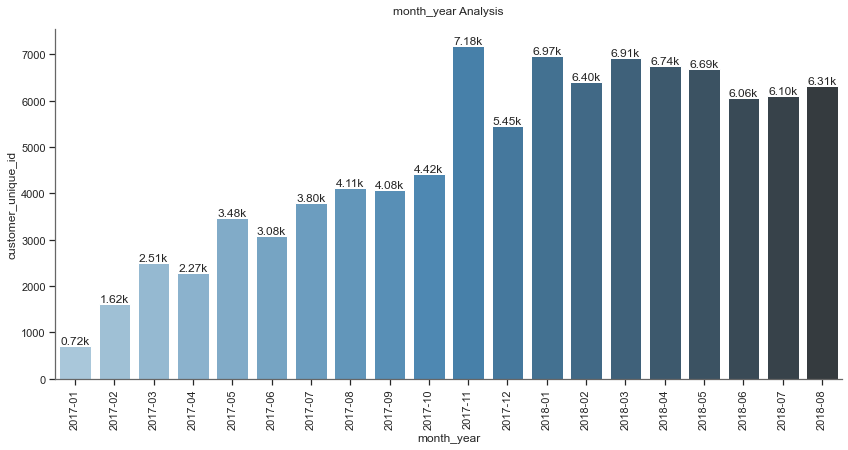

In [260]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df.groupby('month_year')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='customer_unique_id', df=df_monthly_active, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Monthly Order Count 

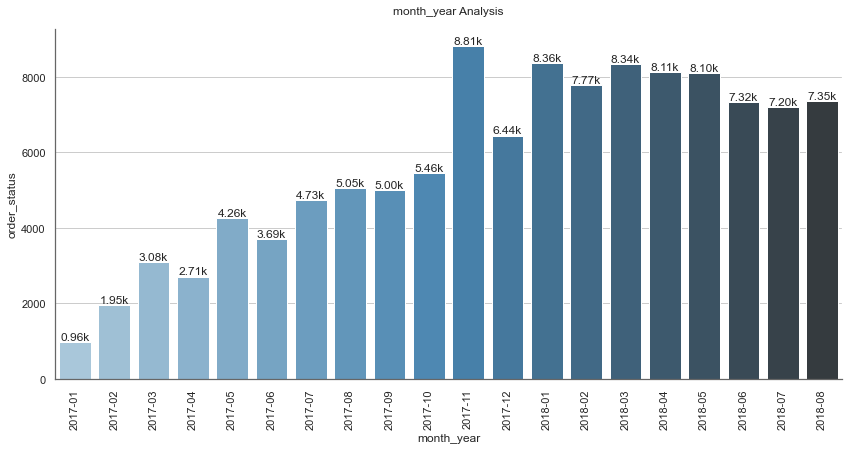

In [261]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_sales = df.groupby('month_year')['order_status'].count().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='order_status', df=df_monthly_sales, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## New Customer Ratio

In [262]:
#create a dataframe contaning CustomerID and first purchase date
df_min_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.min().reset_index()
df_min_purchase.columns = ['customer_unique_id','minpurchasedate']
df_min_purchase['minpurchasedate'] = df_min_purchase['minpurchasedate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
df = pd.merge(df, df_min_purchase, on='customer_unique_id')

In [263]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
df['usertype'] = 'New'
df.loc[df['month_y']>df['minpurchasedate'],'usertype'] = 'Existing'

#calculate the Revenue per month for each user type
df_user_type_revenue = df.groupby(['month_y','usertype', 'month_year'])['payment_value'].sum().reset_index()

df_user_type_revenue

month_y  usertype month_year  payment_value
0    201701       New    2017-01      176376.56
1    201702  Existing    2017-02         111.07
2    201702       New    2017-02      323704.88
3    201703  Existing    2017-03         596.38
4    201703       New    2017-03      505139.45
5    201704  Existing    2017-04        2677.76
6    201704       New    2017-04      453430.56
7    201705  Existing    2017-05        6733.95
8    201705       New    2017-05      694385.65
9    201706  Existing    2017-06        6956.06
10   201706       New    2017-06      578444.92
11   201707  Existing    2017-07       13276.36
12   201707       New    2017-07      702793.62
13   201708  Existing    2017-08       15000.05
14   201708       New    2017-08      827689.89
15   201709  Existing    2017-09       14011.16
16   201709       New    2017-09      982074.45
17   201710  Existing    2017-10       20695.65
18   201710       New    2017-10      977913.97
19   201711  Existing    2017-11       24770.55
20   201711       New    2017-11     1523777.31
21   201712  Existing    2017-12       24133.48
22   201712       New    2017-12      995933.78
23   201801  Existing    2018-01       24698.90
24   201801       New    2018-01     1349365.12
25   201802  Existing    2018-02       26661.62
26   201802       New    2018-02     1253352.92
27   201803  Existing    2018-03       34568.26
28   201803       New    2018-03     1400890.07
29   201804  Existing    2018-04       41982.07
30   201804       New    2018-04     1424625.08
31   201805  Existing    2018-05       35888.25
32   201805       New    2018-05     1444779.34
33   201806  Existing    2018-06       40794.44
34   201806       New    2018-06     1244602.34
35   201807  Existing    2018-07       33086.53
36   201807       New    2018-07     1273620.89
37   201808  Existing    2018-08       27898.55
38   201808       New    2018-08     1183341.54

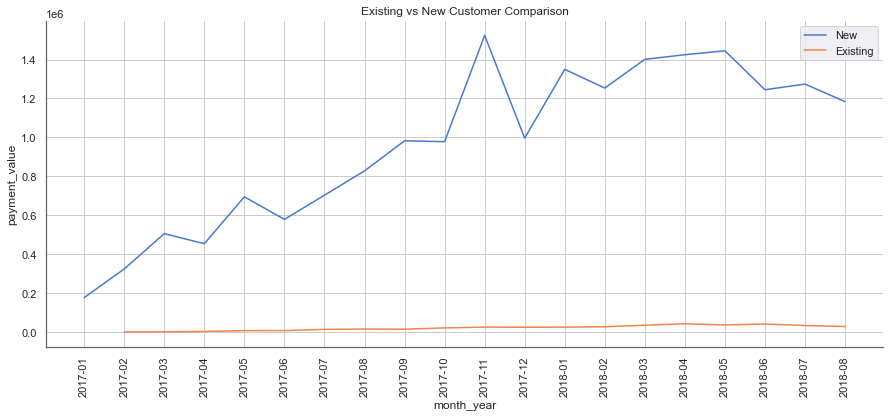

In [264]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set(palette='muted', color_codes=True)
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'New'"), label='New')
ax = sns.lineplot(x='month_year', y='payment_value', data=df_user_type_revenue.query("usertype == 'Existing'"), label='Existing')
format_spines(ax, right_border=False)
ax.set_title('Existing vs New Customer Comparison')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## New Customer Ratio

In [265]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = df.query("usertype == 'New'").groupby(['month_year'])['customer_unique_id'].nunique()/df.query("usertype == 'Existing'").groupby(['month_year'])['customer_unique_id'].nunique() 
df_user_ratio = df_user_ratio.reset_index()

#dropping nan values that resulted from first and last month
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['month_year','NewCusRatio']

#print the dafaframe
df_user_ratio

month_year  NewCusRatio
1     2017-02   808.000000
2     2017-03   500.600000
3     2017-04   132.764706
4     2017-05   123.214286
5     2017-06    77.871795
6     2017-07    76.591837
7     2017-08    71.175439
8     2017-09    51.333333
9     2017-10    49.193182
10    2017-11    57.868852
11    2017-12    47.660714
12    2018-01    52.236641
13    2018-02    56.151786
14    2018-03    48.741007
15    2018-04    40.629630
16    2018-05    35.178378
17    2018-06    32.285714
18    2018-07    39.377483
19    2018-08    37.012048

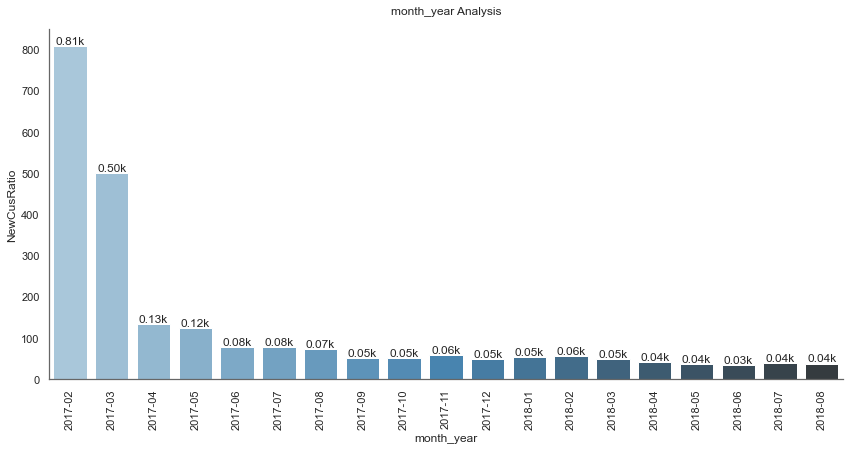

In [266]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_year', y='NewCusRatio', df=df_user_ratio, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

## Monthly Retention Rate

In [267]:
#Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total (using crosstab)

#identifying active users are active by looking at their revenue per month
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].sum().reset_index()
df_user_purchase.head()

customer_unique_id  month_y  payment_value
0  0000366f3b9a7992bf8c76cfdf3221e2   201805         141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f   201805          27.19
2  0000f46a3911fa3c0805444483337064   201703          86.22
3  0000f6ccb0745a6a4b88665a16c9f078   201710          43.62
4  0004aac84e0df4da2b147fca70cf8255   201711         196.89

In [268]:
#identifying active users are active by looking at their order count per month
df_user_purchase = df.groupby(['customer_unique_id','month_y'])['payment_value'].count().reset_index()
df_user_purchase.head()

customer_unique_id  month_y  payment_value
0  0000366f3b9a7992bf8c76cfdf3221e2   201805              1
1  0000b849f77a49e4a4ce2b2a4ca5be3f   201805              1
2  0000f46a3911fa3c0805444483337064   201703              1
3  0000f6ccb0745a6a4b88665a16c9f078   201710              1
4  0004aac84e0df4da2b147fca70cf8255   201711              1

In [269]:
#create retention matrix with crosstab using purchase
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
df_retention.head()

month_y                customer_unique_id  201701  201702  201703  201704  \
0        0000366f3b9a7992bf8c76cfdf3221e2       0       0       0       0   
1        0000b849f77a49e4a4ce2b2a4ca5be3f       0       0       0       0   
2        0000f46a3911fa3c0805444483337064       0       0       1       0   
3        0000f6ccb0745a6a4b88665a16c9f078       0       0       0       0   
4        0004aac84e0df4da2b147fca70cf8255       0       0       0       0   

month_y  201705  201706  201707  201708  201709  201710  201711  201712  \
0             0       0       0       0       0       0       0       0   
1             0       0       0       0       0       0       0       0   
2             0       0       0       0       0       0       0       0   
3             0       0       0       0       0       1       0       0   
4             0       0       0       0       0       0       1       0   

month_y  201801  201802  201803  201804  201805  201806  201807  201808  
0             0       0       0       0       1       0       0       0  
1             0       0       0       0       1       0       0       0  
2             0       0       0       0       0       0       0       0  
3             0       0       0       0       0       0       0       0  
4             0       0       0       0       0       0       0       0

In [270]:
#creating an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['month_y'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']

df_retention

month_y  TotalUserCount  RetainedUserCount  RetentionRate
0    201703            2508                  3       0.001196
1    201704            2274                 11       0.004837
2    201705            3478                 14       0.004025
3    201706            3076                 16       0.005202
4    201707            3802                 16       0.004208
5    201708            4114                 23       0.005591
6    201709            4082                 32       0.007839
7    201710            4417                 32       0.007245
8    201711            7182                 37       0.005152
9    201712            5450                 41       0.007523
10   201801            6974                 16       0.002294
11   201802            6401                 27       0.004218
12   201803            6914                 23       0.003327
13   201804            6744                 31       0.004597
14   201805            6693                 45       0.006723
15   201806            6058                 38       0.006273
16   201807            6097                 26       0.004264
17   201808            6310                 37       0.005864

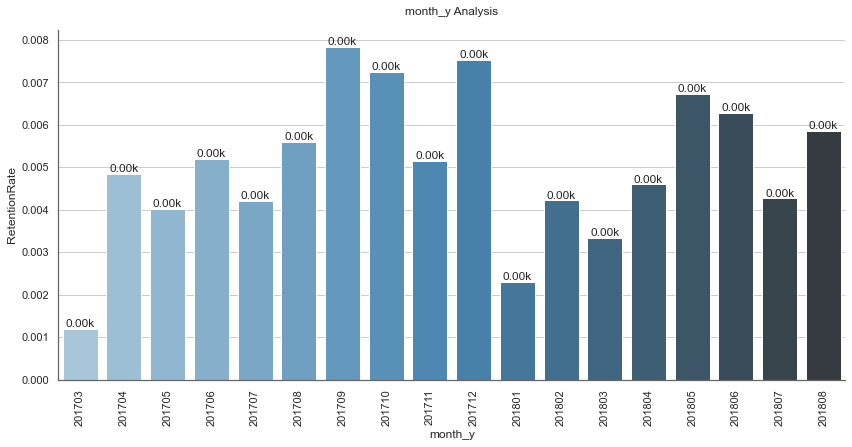

In [271]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set(palette='muted', color_codes=True, style='whitegrid')
bar_plot(x='month_y', y='RetentionRate', df=df_retention, value=True)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

# Cohort Based Retention Rate

#### The first purchase month-year of the customers was defined as cohort 
We will be measuring what percentage of the customers retained after their first purchase in each month. This will help us analyze how the recent and old cohorts differ regarding retention rate

We will also focus on finding whether the recent changes in customer experience affected new customer’s retention or not

In [272]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
new_column_names = [ 'm_' + str(column) for column in df_retention.columns]
df_retention.columns = new_column_names

In [273]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
df_retention = pd.crosstab(df_user_purchase['customer_unique_id'], df_user_purchase['month_y']).reset_index()
new_column_names = [ 'm_' + str(column) for column in df_retention.columns]
df_retention.columns = new_column_names
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = df_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
        

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

In [274]:
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = df_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
     

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

#showing new cohort based retention table
df_retention

TotalUserCount  201702  201703  201704  201705  201706  201707  \
month_y                                                                   
201702             1618     1.0     0.0     0.0    0.00     0.0    0.00   
201703             2508     NaN     1.0     0.0    0.00     0.0    0.00   
201704             2274     NaN     NaN     1.0    0.01     0.0    0.00   
201705             3478     NaN     NaN     NaN    1.00     0.0    0.00   
201706             3076     NaN     NaN     NaN     NaN     1.0    0.01   
201707             3802     NaN     NaN     NaN     NaN     NaN    1.00   
201708             4114     NaN     NaN     NaN     NaN     NaN     NaN   
201709             4082     NaN     NaN     NaN     NaN     NaN     NaN   
201710             4417     NaN     NaN     NaN     NaN     NaN     NaN   
201711             7182     NaN     NaN     NaN     NaN     NaN     NaN   
201712             5450     NaN     NaN     NaN     NaN     NaN     NaN   
201801             6974     NaN     NaN     NaN     NaN     NaN     NaN   
201802             6401     NaN     NaN     NaN     NaN     NaN     NaN   
201803             6914     NaN     NaN     NaN     NaN     NaN     NaN   
201804             6744     NaN     NaN     NaN     NaN     NaN     NaN   
201805             6693     NaN     NaN     NaN     NaN     NaN     NaN   
201806             6058     NaN     NaN     NaN     NaN     NaN     NaN   
201807             6097     NaN     NaN     NaN     NaN     NaN     NaN   
201808             6310     NaN     NaN     NaN     NaN     NaN     NaN   

         201708  201709  201710  201711  201712  201801  201802  201803  \
month_y                                                                   
201702     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201703     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201704     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201705     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201706     0.00    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201707     0.01    0.00    0.00    0.00    0.00     0.0     0.0     0.0   
201708     1.00    0.01    0.00    0.00    0.00     0.0     0.0     0.0   
201709      NaN    1.00    0.01    0.00    0.00     0.0     0.0     0.0   
201710      NaN     NaN    1.00    0.01    0.00     0.0     0.0     0.0   
201711      NaN     NaN     NaN    1.00    0.01     0.0     0.0     0.0   
201712      NaN     NaN     NaN     NaN    1.00     0.0     0.0     0.0   
201801      NaN     NaN     NaN     NaN     NaN     1.0     0.0     0.0   
201802      NaN     NaN     NaN     NaN     NaN     NaN     1.0     0.0   
201803      NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0   
201804      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201805      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201806      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201807      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
201808      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         201804  201805  201806  201807  201808  
month_y                                          
201702      0.0    0.00    0.00     0.0    0.00  
201703      0.0    0.00    0.00     0.0    0.00  
201704      0.0    0.00    0.00     0.0    0.00  
201705      0.0    0.00    0.00     0.0    0.00  
201706      0.0    0.00    0.00     0.0    0.00  
201707      0.0    0.00    0.00     0.0    0.00  
201708      0.0    0.00    0.00     0.0    0.00  
201709      0.0    0.00    0.00     0.0    0.00  
201710      0.0    0.00    0.00     0.0    0.00  
201711      0.0    0.00    0.00     0.0    0.00  
201712      0.0    0.00    0.00     0.0    0.00  
201801      0.0    0.00    0.00     0.0    0.00  
201802      0.0    0.00    0.00     0.0    0.00  
201803      0.0    0.00    0.00     0.0    0.00  
201804      1.0    0.01    0.00     0.0    0.00  
201805 

# RFM Modelling

### Recency — number of days since the last purchase
### Frequency — number of transactions made over a given period
### Monetary — amount spent over a given period of time

In [275]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [276]:
from datetime import timedelta, datetime
import squarify

In [277]:
Olist_db = pd.read_csv("/Users/tejaltandel/archive/olist_all_data.csv")

In [278]:
Olist_db['order_purchase_date'] = Olist_db.order_purchase_timestamp.apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

In [279]:
Olist_db.columns

Index(['Unnamed: 0', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id2', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'review_id2',
       'review_id', 'review_score', 'review_comment_title',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'productid_2', 'customer_state', 'customer_id2', 'uniqueid_2',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'seller_zip_code_prefix', 'seller_city', 'seller_s

In [280]:
Olist_db['InvoiceDate'] = Olist_db.order_purchase_date.apply(lambda x : datetime.strftime(x, '%Y-%m-%d'))

In [281]:
Olist_db['InvoiceDate'] = pd.to_datetime(Olist_db['InvoiceDate'])

In [282]:
print('{:,} rows; {:,} columns'
      .format(Olist_db.shape[0], Olist_db.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(Olist_db[Olist_db.customer_unique_id.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(Olist_db['InvoiceDate'].min(),
                                    Olist_db['InvoiceDate'].max()))

115,609 rows; 56 columns
0 transactions don't have a customer id
Transactions timeframe from 2016-09-04 00:00:00 to 2018-09-03 00:00:00


In [283]:
# Create snapshot date
snapshot_date = Olist_db['InvoiceDate'].max() + timedelta(days=1)
snapshot_date

Timestamp('2018-09-04 00:00:00')

In [284]:
# Grouping by CustomerID
data_process = Olist_db.groupby(['customer_unique_id']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

In [285]:
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'order_id': 'Frequency',
                         'payment_value': 'Monetary'}, inplace=True)
data_process

Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      117          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      120          1     27.19
0000f46a3911fa3c0805444483337064      543          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      327          1     43.62
0004aac84e0df4da2b147fca70cf8255      294          1    196.89
...                                   ...        ...       ...
fffcf5a5ff07b0908bd4e2dbc735a684      453          2   4134.84
fffea47cd6d3cc0a88bd621562a9d061      268          1     84.58
ffff371b4d645b6ecea244b27531430a      574          1    112.46
ffff5962728ec6157033ef9805bacc48      125          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      490          1     71.56

[93396 rows x 3 columns]

In [286]:
data_process['Frequency'].value_counts()

1     79377
2     10227
3      1973
4       940
5       337
6       294
7        70
8        45
10       25
9        25
12       25
11       17
14        8
15        7
24        7
13        4
21        3
20        3
18        1
22        1
26        1
16        1
38        1
19        1
29        1
75        1
35        1
Name: Frequency, dtype: int64

Great, we have 41,431 customer records grouped by recency of their purchase, the frequency by their quantity, and the monetary value of the purchases. Now we can get into the meat of things and use the .qcut() method to assign the relative percentile to their RFM features. But before that, let’s examine the distribution of our Recency, Frequency, and Monetary.

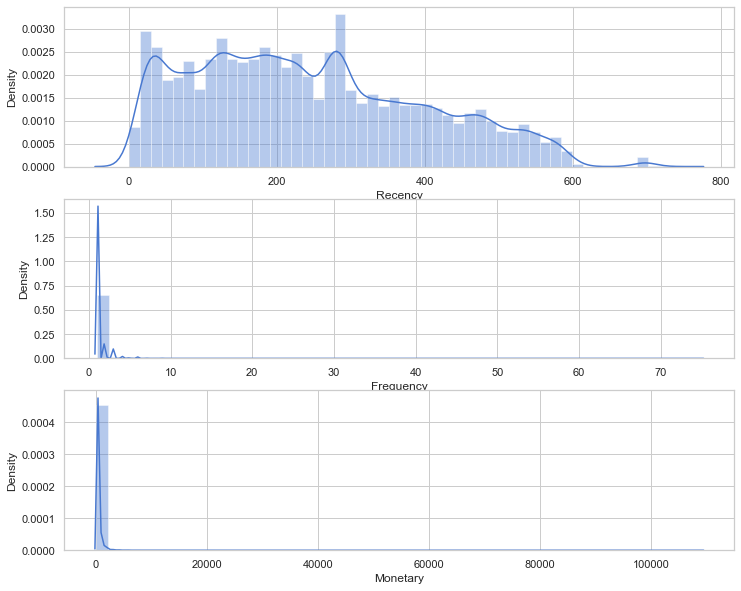

In [287]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(data_process['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(data_process['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(data_process['Monetary'])
# Show the plot
plt.show()

In [288]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = ['Bronze', 'Silver']
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
#f_groups = pd.qcut(data_process['Frequency'], q=[0, .7,  1], labels=f_labels, duplicates='drop')
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values)#, F = f_groups.values)
data_process.head()

Recency  Frequency  Monetary  R
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2      117          1    141.90  4
0000b849f77a49e4a4ce2b2a4ca5be3f      120          1     27.19  4
0000f46a3911fa3c0805444483337064      543          1     86.22  1
0000f6ccb0745a6a4b88665a16c9f078      327          1     43.62  2
0004aac84e0df4da2b147fca70cf8255      294          1    196.89  2

In [289]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['Monetary'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [290]:
data_process

Recency  Frequency  Monetary  R  M
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2      117          1    141.90  4  3
0000b849f77a49e4a4ce2b2a4ca5be3f      120          1     27.19  4  1
0000f46a3911fa3c0805444483337064      543          1     86.22  1  2
0000f6ccb0745a6a4b88665a16c9f078      327          1     43.62  2  1
0004aac84e0df4da2b147fca70cf8255      294          1    196.89  2  3
...                                   ...        ...       ... .. ..
fffcf5a5ff07b0908bd4e2dbc735a684      453          2   4134.84  1  4
fffea47cd6d3cc0a88bd621562a9d061      268          1     84.58  2  2
ffff371b4d645b6ecea244b27531430a      574          1    112.46  1  2
ffff5962728ec6157033ef9805bacc48      125          1    133.69  3  3
ffffd2657e2aad2907e67c3e9daecbeb      490          1     71.56  1  2

[93396 rows x 5 columns]

with these 3 scores in place, R, F, and M, we can create our first RFM segment by concatenating the values together below



In [291]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(int(x['R'])) + str(int(x['M']))

data_process['RFM_Segment'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

Recency  Frequency  Monetary  R  M  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      117          1    141.90  4  3   
0000b849f77a49e4a4ce2b2a4ca5be3f      120          1     27.19  4  1   
0000f46a3911fa3c0805444483337064      543          1     86.22  1  2   
0000f6ccb0745a6a4b88665a16c9f078      327          1     43.62  2  1   
0004aac84e0df4da2b147fca70cf8255      294          1    196.89  2  3   

                                 RFM_Segment  
customer_unique_id                            
0000366f3b9a7992bf8c76cfdf3221e2          43  
0000b849f77a49e4a4ce2b2a4ca5be3f          41  
0000f46a3911fa3c0805444483337064          12  
0000f6ccb0745a6a4b88665a16c9f078          21  
0004aac84e0df4da2b147fca70cf8255          23

In [292]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

16


In [293]:
rfm['RFM_Score'] = rfm[['R','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    7
0000b849f77a49e4a4ce2b2a4ca5be3f    5
0000f46a3911fa3c0805444483337064    3
0000f6ccb0745a6a4b88665a16c9f078    3
0004aac84e0df4da2b147fca70cf8255    5
Name: RFM_Score, dtype: int64


In [294]:
# Define rfm_level function
def rfm_level(df):
    if (df['RFM_Segment'] >= 44 or (df['RFM_Score'] >= 8)) :
        return 'VVIP - Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 7) and (df['M'] == 4)):
        return 'Champions Big Spenders'
#     elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
#         return 'Loyal Customers'
    elif ((df['RFM_Segment'] >= 21) or (df['RFM_Score'] >= 6)):
        return 'Potential Loyalists'
    elif (((df['RFM_Segment'] >= 11) and (df['R'] == 1)) or df['RFM_Score'] == 4):
        return 'Needs Attention'
    elif ((df['RFM_Score'] >= 3) and (df['R'] == 1)):
        return 'Hibernating - Almost Lost'
    else:
        return 'Lost Customers'

In [295]:
# Define rfm_level function
def rfm_action(df):
    if (df['RFM_Segment'] >= 44 or (df['RFM_Score'] >= 8)) :
        return 'No Price Incentives; Offer Limited edition and Loyality programs'
    elif ((df['RFM_Score'] >= 7) and (df['M'] == 4)):
        return 'Upsell most expensive items'
#     elif ((df['RFM_Score'] >= 6) and (df['F'] >= 2)):
#         return 'Loyality programs;Cross Sell'
    elif ((df['RFM_Segment'] >= 21) or (df['RFM_Score'] >= 5)):
        return 'Cross Sell Recommendations and Discount coupons'
    elif (((df['RFM_Segment'] >= 11) and (df['R'] == 1)) or df['RFM_Score'] == 4):
        return 'Price incentives and Limited time offer'
    elif ((df['RFM_Score'] >= 3) and (df['R'] == 1)):
        return 'Aggressive price incentives'
    else:
        return 'Don\'t spend too much trying to re-acquire'

In [296]:
# Create a new variable RFM_Level
rfm['RFM_Segment'] = rfm.RFM_Segment.apply(lambda x: int(x))
rfm['Customer Segment'] = rfm.apply(rfm_level, axis=1)
# Create a new variable RFM_Level
rfm['Marketing Action'] = rfm.apply(rfm_action, axis=1)
rfm.head(10)

Recency  Frequency  Monetary  R  M  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      117          1    141.90  4  3   
0000b849f77a49e4a4ce2b2a4ca5be3f      120          1     27.19  4  1   
0000f46a3911fa3c0805444483337064      543          1     86.22  1  2   
0000f6ccb0745a6a4b88665a16c9f078      327          1     43.62  2  1   
0004aac84e0df4da2b147fca70cf8255      294          1    196.89  2  3   
0004bd2a26a76fe21f786e4fbd80607f      152          1    166.98  3  3   
00050ab1314c0e55a6ca13cf7181fecf      137          1     35.38  3  1   
00053a61a98854899e70ed204dd4bafe      188          2    838.36  3  4   
0005e1862207bf6ccc02e4228effd9a0      549          1    150.12  1  3   
0005ef4cd20d2893f0d9fbd94d3c0d97      176          1    129.76  3  3   

                                  RFM_Segment  RFM_Score  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2           43          7   
0000b849f77a49e4a4ce2b2a4ca5be3f           41          5   
0000f46a3911fa3c0805444483337064           12          3   
0000f6ccb0745a6a4b88665a16c9f078           21          3   
0004aac84e0df4da2b147fca70cf8255           23          5   
0004bd2a26a76fe21f786e4fbd80607f           33          6   
00050ab1314c0e55a6ca13cf7181fecf           31          4   
00053a61a98854899e70ed204dd4bafe           34          7   
0005e1862207bf6ccc02e4228effd9a0           13          4   
0005ef4cd20d2893f0d9fbd94d3c0d97           33          6   

                                        Customer Segment  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2     Potential Loyalists   
0000b849f77a49e4a4ce2b2a4ca5be3f     Potential Loyalists   
0000f46a3911fa3c0805444483337064         Needs Attention   
0000f6ccb0745a6a4b88665a16c9f078     Potential Loyalists   
0004aac84e0df4da2b147fca70cf8255     Potential Loyalists   
0004bd2a26a76fe21f786e4fbd80607f     Potential Loyalists   
00050ab1314c0e55a6ca13cf7181fecf     Potential Loyalists   
00053a61a98854899e70ed204dd4bafe  Champions Big Spenders   
0005e1862207bf6ccc02e4228effd9a0         Needs Attention   
0005ef4cd20d2893f0d9fbd94d3c0d97     Potential Loyalists   

                                                                 Marketing Action  
customer_unique_id                                                                 
0000366f3b9a7992bf8c76cfdf3221e2  Cross Sell Recommendations and Discount coupons  
0000b849f77a49e4a4ce2b2a4ca5be3f  Cross Sell Recommendations and Discount coupons  
0000f46a3911fa3c0805444483337064          Price incentives and Limited time offer  
0000f6ccb0745a6a4b88665a16c9f078  Cross Sell Recommendations and Discount coupons  
0004aac84e0df4da2b147fca70cf8255  Cross Sell Recommendations and Discount coupons  
0004bd2a26a76fe21f786e4fbd80607f  Cross Sell Recommendations and Discount coupons  
00050ab1314c0e55a6ca13cf7181fecf  Cross Sell Recommendations and Discount coupons  
00053a61a98854899e70ed204dd4bafe                      Upsell most expensive items  
0005e1862207bf6ccc02e4228effd9a0          Price incentives and Limited time offer  
0005ef4cd20d2893f0d9fbd94d3c0d97  Cross Sell Recommendations and Discount coupons

In [297]:
rfm.to_csv("/Users/tejaltandel/archive/rfm.csv")

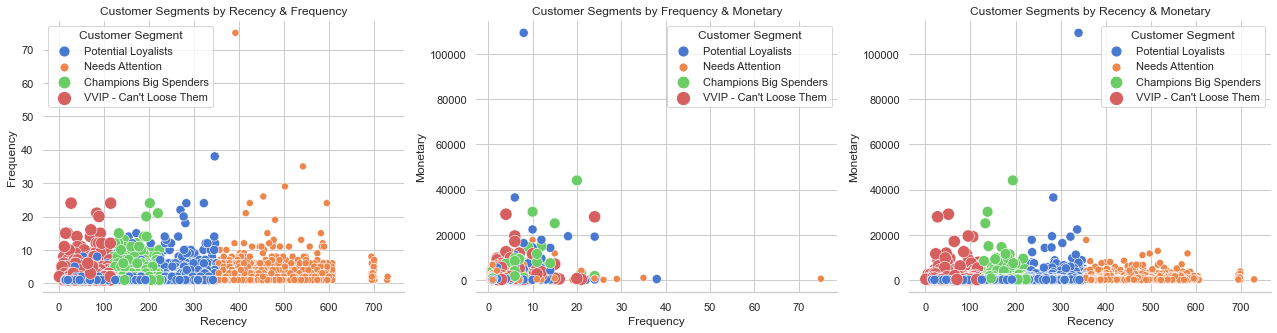

In [298]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.despine(left=True)
sns.scatterplot(x='Recency', y='Frequency', ax=axs[0], hue='Customer Segment', data=rfm, size='Customer Segment', sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
sns.scatterplot(x='Frequency', y='Monetary', ax=axs[1], hue='Customer Segment', data=rfm, size='Customer Segment' , sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
sns.scatterplot(x='Recency', y='Monetary', ax=axs[2], hue='Customer Segment', data=rfm, size='Customer Segment' , sizes=(50,150), size_order=['VVIP - Can\'t Loose Them','Champions Big Spenders','Potential Loyalists','Needs Attention'])
axs[0].set_title('Customer Segments by Recency & Frequency')
axs[1].set_title('Customer Segments by Frequency & Monetary')
axs[2].set_title('Customer Segments by Recency & Monetary')
plt.show()

In [299]:
import plotly.express as px

fig = px.scatter(rfm, x="Recency", y="Frequency", color="Customer Segment", size = "Frequency")
fig.show()

## Group Customers by their Customer Segment

In [300]:
# Calculate average values for each Customer Segment, and return a size of each segment 
rfm_level_agg = rfm.groupby('Customer Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'Marketing Action': 'unique'
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                        Recency Frequency Monetary         \
                           mean      mean     mean  count   
Customer Segment                                            
Champions Big Spenders    171.8       1.7    565.5   5814   
Needs Attention           458.4       1.2    206.5  23249   
Potential Loyalists       183.5       1.1    143.2  58390   
VVIP - Can't Loose Them    64.8       1.7    584.9   5943   

                                                          Marketing Action  
                                                                    unique  
Customer Segment                                                            
Champions Big Spenders                       [Upsell most expensive items]  
Needs Attention          [Price incentives and Limited time offer, Cros...  
Potential Loyalists      [Cross Sell Recommendations and Discount coupons]  
VVIP - Can't Loose Them  [No Price Incentives; Offer Limited edition an...  


In [301]:
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                              mean      mean     mean  count   
0   Champions Big Spenders   171.8       1.7    565.5   5814   
1          Needs Attention   458.4       1.2    206.5  23249   
2      Potential Loyalists   183.5       1.1    143.2  58390   
3  VVIP - Can't Loose Them    64.8       1.7    584.9   5943   

                                    Marketing Action  
                                              unique  
0                      [Upsell most expensive items]  
1  [Price incentives and Limited time offer, Cros...  
2  [Cross Sell Recommendations and Discount coupons]  
3  [No Price Incentives; Offer Limited edition an...

In [302]:
ck = pd.DataFrame(rfm_level_ag[("Monetary","count")])

In [303]:
ck['new'] = (rfm_level_ag[("Monetary","count")]/sum(rfm_level_ag[("Monetary","count")]))*100

In [304]:
ck

Monetary        new
     count           
0     5814   6.225106
1    23249  24.892929
2    58390  62.518737
3     5943   6.363228

In [305]:
decimals = 2    
ck['new'] = ck['new'].apply(lambda x: round(x, decimals))

In [306]:
ck['new']=ck['new'].astype(str)
ck['new']

0     6.23
1    24.89
2    62.52
3     6.36
Name: new, dtype: object

In [307]:
ck.new=[x+'%'for x in ck.new]
ck

Monetary     new
     count        
0     5814   6.23%
1    23249  24.89%
2    58390  62.52%
3     5943   6.36%

# RFM MODELING

From here, we can see that a sufficient percentage (~45%) of our customers are in the top tier RFM levels. Olist must be doing something right to be maintaining their loyalty! The other 55% will need some work.

### 1. Potential Loyalists —
High potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

### 2. Needs Attention —
Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

### 3. Hibernating Almost Lost —
Made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

### 4. Lost Customers —
Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

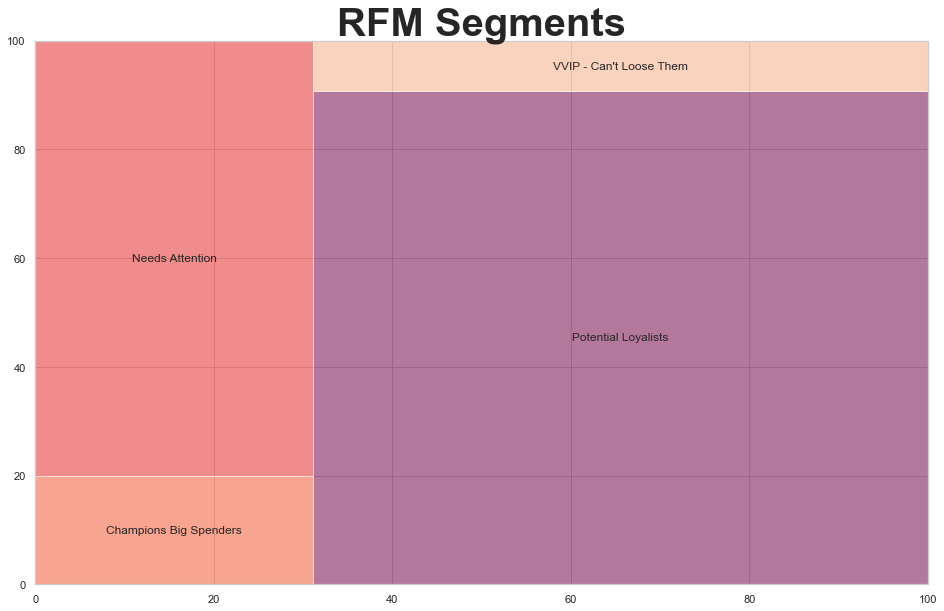

In [308]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'MarketingAction']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Champions Big Spenders',
                     'Needs Attention',
                     'Potential Loyalists',
                     'VVIP - Can\'t Loose Them'], alpha=.6 )
plt.title("RFM Segments",fontsize=40,fontweight="bold")
plt.axis('on')
plt.show()

In [309]:
rfm_level_agg

RecencyMean  FrequencyMean  MonetaryMean  Count  \
Customer Segment                                                           
Champions Big Spenders         171.8            1.7         565.5   5814   
Needs Attention                458.4            1.2         206.5  23249   
Potential Loyalists            183.5            1.1         143.2  58390   
VVIP - Can't Loose Them         64.8            1.7         584.9   5943   

                                                           MarketingAction  
Customer Segment                                                            
Champions Big Spenders                       [Upsell most expensive items]  
Needs Attention          [Price incentives and Limited time offer, Cros...  
Potential Loyalists      [Cross Sell Recommendations and Discount coupons]  
VVIP - Can't Loose Them  [No Price Incentives; Offer Limited edition an...

In [310]:
rfm_level_ag['%ofTotalCustomers'] = ck['new']

In [311]:
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                              mean      mean     mean  count   
0   Champions Big Spenders   171.8       1.7    565.5   5814   
1          Needs Attention   458.4       1.2    206.5  23249   
2      Potential Loyalists   183.5       1.1    143.2  58390   
3  VVIP - Can't Loose Them    64.8       1.7    584.9   5943   

                                    Marketing Action %ofTotalCustomers  
                                              unique                    
0                      [Upsell most expensive items]             6.23%  
1  [Price incentives and Limited time offer, Cros...            24.89%  
2  [Cross Sell Recommendations and Discount coupons]            62.52%  
3  [No Price Incentives; Offer Limited edition an...             6.36%

# Interactive Chart for Visualising Customer Segments

In [312]:
import plotly.graph_objects as go

fig =go.Figure(go.Treemap(
    labels = rfm_level_ag['Customer Segment'],
    parents = ['Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation', 'Customer Segmentation'],   #rfm_level_ag[('Marketing Action', 'unique')].tolist(), 
    values= rfm_level_ag[("Monetary","count")],
   
))

fig.show()

In [313]:
#rfm_level_ag.to_csv("/Users/tejaltandel/archive/CustomerSeg1.csv")

We can form our Marketing campaigns and targeting Strategies based on the above Customer Segmentation.

- We can Upsell high end products to Big Spenders
- We can Cross Sell complimentary products to Loyal and Best Customers

## Thus, the customers are segmented based on the RFM score

## K-Means Clustering

### Kmeans is an iterative technique that attempts to divide a dataset into K separate groups. It attempts to make intra-cluster data points as comparable as possible while maintaining clusters as separated as possible. It assigns data points to a cluster so that the sum of their squared distances from the cluster's centroid is as small as possible. Within clusters, the less variance there is, the more uniform the data points are.

In [315]:
data_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
data_rfm.min()

Recency      1.00
Frequency    1.00
Monetary     9.59
dtype: float64

In [316]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)

In [317]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         256.8       2.1    319.7  10398
1         296.4       1.0     65.0  36579
2         283.4       1.0    278.1  27297
3          49.8       1.0    134.4  16160
4         238.1       4.4   1507.0   2962

To find which ‘k’ value is more suitable for our data we will use elbow method.

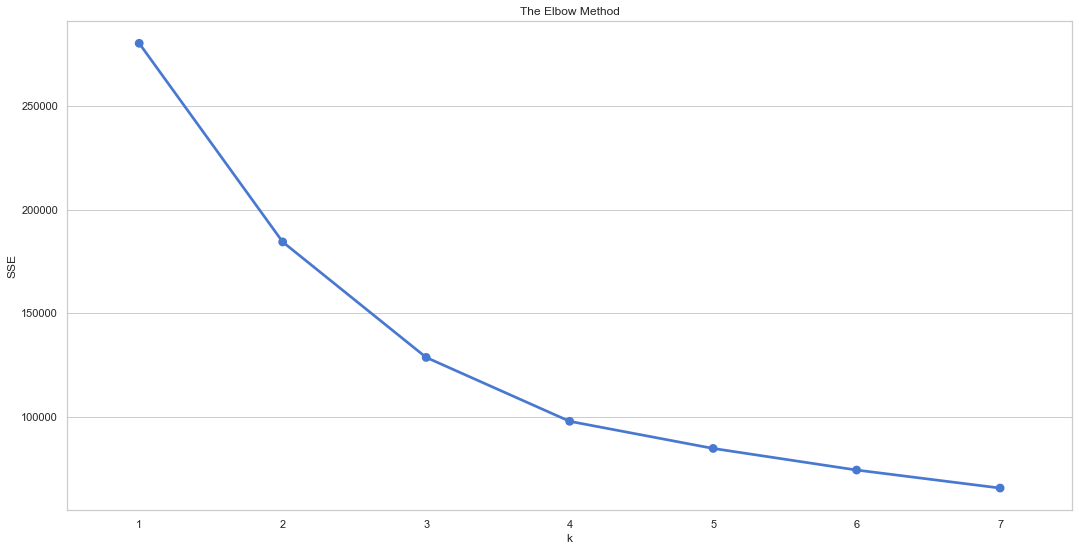

In [318]:
sse = {}
for k in range(1, 8):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [319]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k4 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0          50.1       1.0    134.2  16349
1         252.6       2.6    599.7  12949
2         284.2       1.0    276.3  27570
3         296.4       1.0     64.4  36528

In [320]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['customer_unique_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(10)

customer_unique_id  Cluster   Metric  Value
0  0000366f3b9a7992bf8c76cfdf3221e2        2  Recency  117.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f        3  Recency  120.0
2  0000f46a3911fa3c0805444483337064        3  Recency  543.0
3  0000f6ccb0745a6a4b88665a16c9f078        3  Recency  327.0
4  0004aac84e0df4da2b147fca70cf8255        2  Recency  294.0
5  0004bd2a26a76fe21f786e4fbd80607f        2  Recency  152.0
6  00050ab1314c0e55a6ca13cf7181fecf        3  Recency  137.0
7  00053a61a98854899e70ed204dd4bafe        1  Recency  188.0
8  0005e1862207bf6ccc02e4228effd9a0        2  Recency  549.0
9  0005ef4cd20d2893f0d9fbd94d3c0d97        2  Recency  176.0

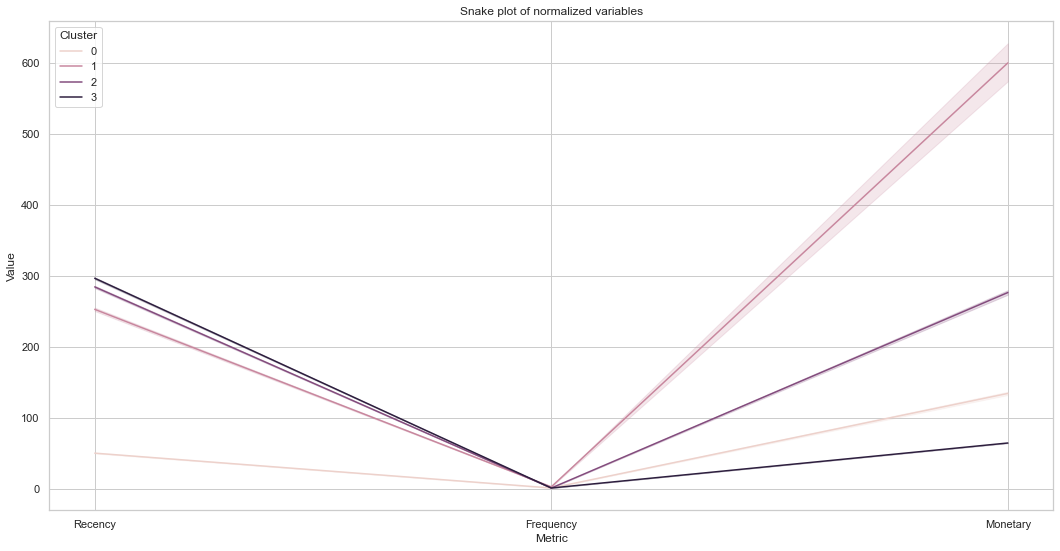

In [321]:
# Snake Plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

### Calculate relative importance of each attribute
Now we will calculate the relative importance of the RFM values within each cluster.

In [322]:
cluster_avg = data_rfm_k4.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Recency  Frequency  Monetary
Cluster                              
0          -0.79      -0.16     -0.37
1           0.04       1.13      1.81
2           0.17      -0.19      0.29
3           0.22      -0.18     -0.70

In [323]:
relative_imp.to_csv("/Users/tejaltandel/archive/CustomerSeg2relimp.csv")

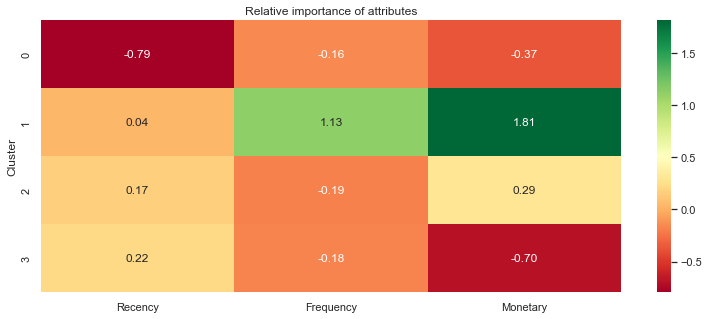

In [324]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.savefig('/Users/tejaltandel/archive/kmeans.png',transparent=True)
plt.show()

In [325]:
ak = pd.read_csv('/Users/tejaltandel/archive/cltv.csv')

In [326]:
ak

customer_id       value
0        C00006  140.267698
1        C00044  201.920816
2        C00118  200.434271
3        C00265  141.499576
4        C00274  191.852584
..          ...         ...
660      C96806  181.381622
661      C96812  171.064645
662      C96845  229.164269
663      C96904  129.607217
664      C96990  206.599583

[665 rows x 2 columns]

In [327]:
import plotly.express as px

fig = px.bar(ak, x='customer_id', y='value')
fig.show()

# CONCLUSION

## Relative Importance of RFM among K-Means Clusters
We can see that our grouped summary of the mean of R, F, M that each cluster of customers places a different emphasis on our 4 features:

### Cluster 0
It performs poorly across R, F, and M. we will need to design campaigns to activate them again.

### Cluster 1
It has the highest MontaryValue mean and low Recency mean and the highest frequency mean — This is our ideal customer segment

### Cluster 2
It has spent quite a fair amount with us but has not shopped with us in the 3–4 months — We will need to do something before we lose them!

### Cluster 3
They shopped with us recently but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value and come back to purchase?